### k-Means Algorithm

In [47]:
import numpy as np
import math
import operator #in order to sort python dictionary by values
import random
import matplotlib.pyplot as plt

class PreProcessing(object):
    
    def readData(self, filepath, raw_length):
        with open(filepath) as fp:
            for i, line in enumerate(fp):
                x = line.split(",")
                x = np.array(x).reshape((1,raw_length))

                if i==0: 
                    data = x
                else:
                    data = np.concatenate((data,x),axis=0)       

        #print("Number of samples: ",data.shape[0])  
        
        return data
        
    def split_X_Y(self,data):
        numberOfFeatures = data.shape[1]-1
        numberOfSamples = data.shape[0]
        x = data[:,0:numberOfFeatures].reshape((numberOfSamples,numberOfFeatures))
        y = data[:,-1].reshape((numberOfSamples,1))
        #print("X Shape: ", x.shape)
        #print("Y Shape: ", y.shape)
        
        return x,y            
#**********************************************************************************   
class kMeans(object):
    
    def __init__(self, k):
        self.k = k
            
            
    def euclideanDistance(self,sample1,sample2):
        #print("sample1: ",sample1)
        #print("sample2: ",sample2)
        sum = 0
        for i in range(sample1.shape[0]):
            number = sample1[i]-sample2[i]
            sum = sum + math.pow(number,2)
        result = math.pow(sum,0.5)
        return result
    
    
    def selectRandomCenter(self,x,k):
        centers = []
        for i in range(k):
            id = random.randrange(x.shape[0])
            centers.append(x[id])
        centers = np.array(centers)
        return centers
    
    
    def loss(self,x, k, clusters, centers):
        
        loss = 0
        
        for i in range(k):
            data = []

            for sample_id,sample in enumerate(x):

                if int(clusters[sample_id]) == i:
                    data.append(sample)
            
            single_cluster_loss = [math.pow(self.euclideanDistance(sample,centers[i]),2) for sample in data]
            loss = loss + sum(single_cluster_loss)
            
        return loss
    
    
    def newCenter(self,data):

        data = np.array(data)
        new_center = np.zeros((1,data.shape[1]))

        for i in range(data.shape[1]):
            column = []
            for j in range(data.shape[0]):
                column.append(data[j][i])
            mean = np.mean(np.array(column).reshape((data.shape[0],1)))
            new_center[0][i]=mean
            
        return new_center
    
    
    def updateCenters(self, x, k, clusters, centers):
        
        centers_ = []
        
        for i in range(k):
            data = []

            for sample_id,sample in enumerate(x):

                if int(clusters[sample_id]) == i:
                    data.append(sample)
                    
            if len(data)!=0:
                new_center = self.newCenter(data)
                centers_.append(new_center)

        return centers_
    
    
    def splitCluster(self,x,clusters,k):
        dictionary = {}
        
        for i in range(k):
            data = []

            for sample_id,sample in enumerate(x):

                if int(clusters[sample_id]) == i:
                    data.append(sample)
                    
            if len(data)!=0:
                dictionary[str(i)] = data
                
        return dictionary
    
    
    def show(self,show_clusters,i):
        #print("Epoch: ",i)
        cluster0 = np.array(show_clusters["0"])
        c0_length = len(cluster0)
        cluster1 = np.array(show_clusters["1"])
        c1_length = len(cluster1)
        c0_f1 = cluster0[:,0].reshape((c0_length,1))
        c0_f2 = cluster0[:,1].reshape((c0_length,1))
        c1_f1 = cluster1[:,0].reshape((c1_length,1))
        c1_f2 = cluster1[:,1].reshape((c1_length,1))
        fig, ax = plt.subplots()
        ax.plot(c0_f1, c0_f2, 'ro' ) 
        ax.plot(c1_f1, c1_f2, 'bo' ) 
        ax.set_title("Clutered Data")
        ax.legend();
        
        
    def Silhouette(self, clusters, centers):
        
        coeff = {}
        
        for i in range(len(clusters)):
            
            single_cluster = clusters[str(i)]
            cluster_coeff = []
            
            for sample_id, sample in enumerate(single_cluster):
                
                distances = []
                
                for center_id, center in enumerate(centers):
                    
                    if center_id == i:
                        a = self.euclideanDistance(center, sample)
                        
                    if center_id != i:
                        distance = self.euclideanDistance(center, sample)
                        distances.append(distance)
                        
                b = min(distances)          
                s = (b-a)/max(b,a)
                cluster_coeff.append(s)
           
            coeff[str(i)] = sorted(cluster_coeff)
        
        
        return coeff
        
        
        
    def fit(self,x,epoch):
        
        objective_function = []
        
        for i in range(epoch):
            #print("Epoch: ",i+1)
            
            clusters = []
            
            if i==0:
                centers = self.selectRandomCenter(x,self.k)
                
                #Plot Initial Cluster Centers and Data
                x1 = x[:,0].reshape((x.shape[0],1))
                x2 = x[:,1].reshape((x.shape[0],1))
                center1 = centers[:,0].reshape((centers.shape[0],1))
                center2 = centers[:,1].reshape((centers.shape[0],1))
                plt.scatter(x1,x2,c='r')
                plt.scatter(center1,center2,c='y')
                plt.title("Initial Cluster Centers and Data")
                plt.show()


            for sample_id,sample in enumerate(x):
                
                distances = {}
                
                for center_id, center in enumerate(centers):
                    
                    single_distance = self.euclideanDistance(center,sample)
                    distances[str(center_id)] = single_distance
                    
                sorted_distances = sorted(distances.items(), key=operator.itemgetter(1))
                clusters.append(sorted_distances[0][0]) #sampleın ait olduğu cluster bilgisi, sample ın clusterı belirlendi
            
            loss = self.loss(x, self.k, clusters, centers)
            objective_function.append(loss)
            centers = self.updateCenters(x, self.k, clusters, centers)
            centers = np.array(centers).reshape((self.k,x.shape[1]))     
            show_clusters = self.splitCluster(x,clusters,self.k)
            #self.show(show_clusters,i)
            
        clusters= self.splitCluster(x,clusters,self.k)
        #Plot Initial Cluster Centers and Data
        x1 = x[:,0].reshape((x.shape[0],1))
        x2 = x[:,1].reshape((x.shape[0],1))
        center1 = centers[:,0].reshape((centers.shape[0],1))
        center2 = centers[:,1].reshape((centers.shape[0],1))
        plt.scatter(x1,x2,c='r')
        plt.scatter(center1,center2,c='y')
        plt.title("Final Cluster Centers and Data")
        plt.show()    
        
        print("Final Loss: ",loss)

        return clusters, centers, objective_function, loss

#MAIN****************************************************************************

### Dataset = 1, k = 3

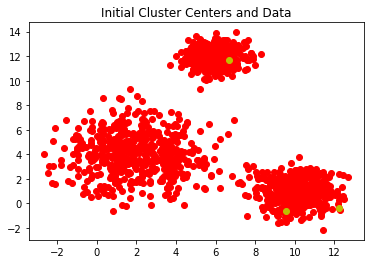

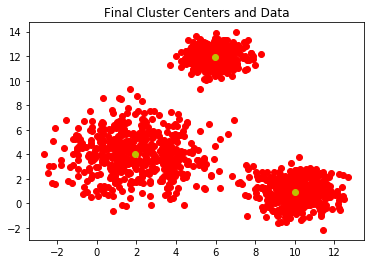

Final Loss:  4489.435783055385


Text(0.5, 1.0, 'Objective Function\nLast Loss Value: 4489.435783055385')

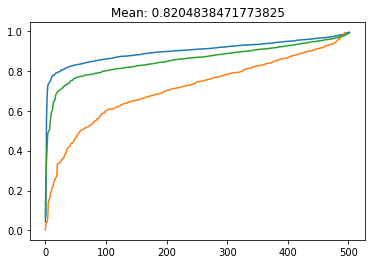

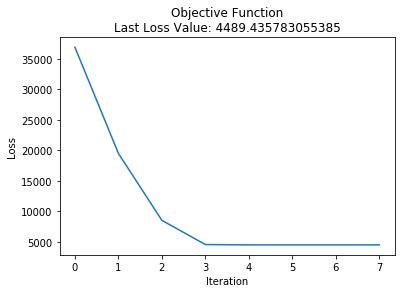

In [55]:
preprocessing = PreProcessing()
#Data Preprocessing
filepath = 'data/1.txt'
data = preprocessing.readData(filepath,3)
x, y = preprocessing.split_X_Y(data)
x = np.float32(x)


k=3
epoch = 8
model = kMeans(k)
clusters, centers, objective_function, last_loss = model.fit(x,epoch) #clusters is dictionary!

coefficients = model.Silhouette(clusters, centers)

plt.figure()
plt.plot(coefficients["0"])
plt.plot(coefficients["1"])
plt.plot(coefficients["2"])
avg = np.mean(coefficients["0"]+coefficients["1"]+coefficients["2"])
plt.title("Mean: "+str(avg))

plt.figure()

plt.plot(objective_function)
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.title("Objective Function\n"+"Last Loss Value: "+str(last_loss))

### Dataset = 1 , k = 7

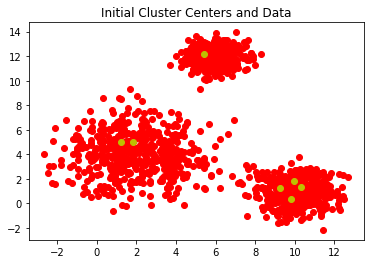

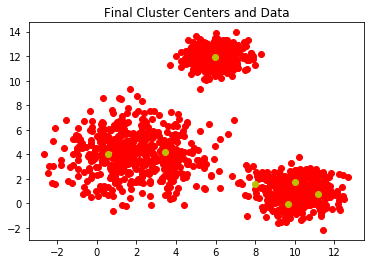

Final Loss:  2802.539266586461


Text(0.5, 1.0, 'Objective Function\nLast Loss Value: 2802.539266586461')

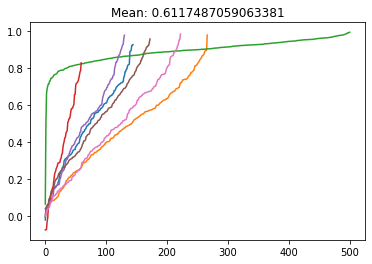

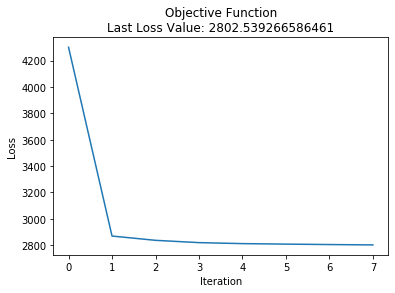

In [57]:
preprocessing = PreProcessing()
#Data Preprocessing
filepath = 'data/1.txt'
data = preprocessing.readData(filepath,3)
x, y = preprocessing.split_X_Y(data)
x = np.float32(x)


k=7
epoch = 8
model = kMeans(k)
clusters, centers, objective_function, last_loss = model.fit(x,epoch) #clusters is dictionary!

coefficients = model.Silhouette(clusters, centers)

plt.figure()
plt.plot(coefficients["0"])
plt.plot(coefficients["1"])
plt.plot(coefficients["2"])
plt.plot(coefficients["3"])
plt.plot(coefficients["4"])
plt.plot(coefficients["5"])
plt.plot(coefficients["6"])
total = coefficients["0"]+coefficients["1"]+coefficients["2"]+coefficients["3"]+coefficients["4"]+coefficients["5"]+coefficients["6"]
avg = np.mean(total)
plt.title("Mean: "+str(avg))

plt.figure()

plt.plot(objective_function)
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.title("Objective Function\n"+"Last Loss Value: "+str(last_loss))

### Dataset = 2 , k = 5

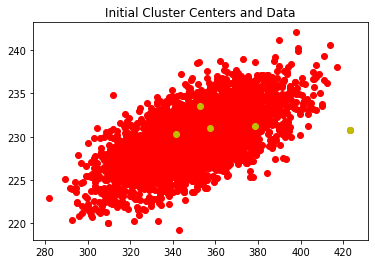

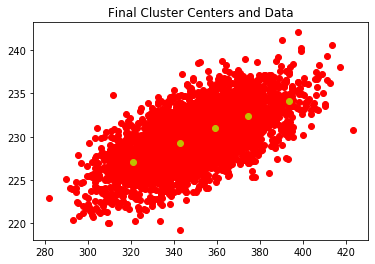

Final Loss:  176290.74053925066


Text(0.5, 1.0, 'Objective Function\nLast Loss Value: 176290.74053925066')

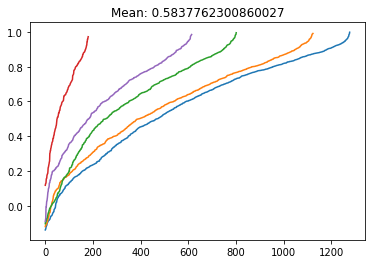

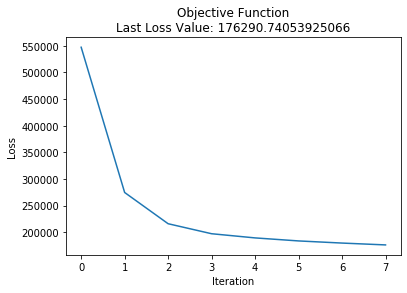

In [58]:
preprocessing = PreProcessing()
#Data Preprocessing
filepath = 'data/2.txt'
data = preprocessing.readData(filepath,3)
x, y = preprocessing.split_X_Y(data)
x = np.float32(x)


k=5
epoch = 8
model = kMeans(k)
clusters, centers, objective_function, last_loss = model.fit(x,epoch) #clusters is dictionary!

coefficients = model.Silhouette(clusters, centers)

plt.figure()
plt.plot(coefficients["0"])
plt.plot(coefficients["1"])
plt.plot(coefficients["2"])
plt.plot(coefficients["3"])
plt.plot(coefficients["4"])

total = coefficients["0"]+coefficients["1"]+coefficients["2"]+coefficients["3"]+coefficients["4"]
avg = np.mean(total)
plt.title("Mean: "+str(avg))

plt.figure()

plt.plot(objective_function)
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.title("Objective Function\n"+"Last Loss Value: "+str(last_loss))

### Dataset = 3, k = 8

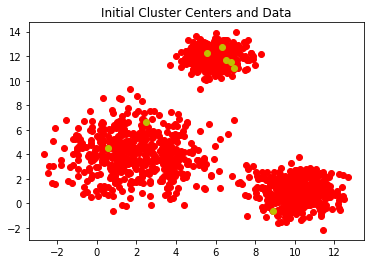

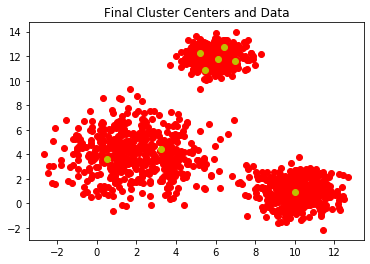

Final Loss:  3156.712171938929


Text(0.5, 1.0, 'Objective Function\nLast Loss Value: 3156.712171938929')

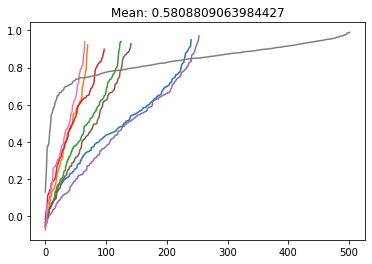

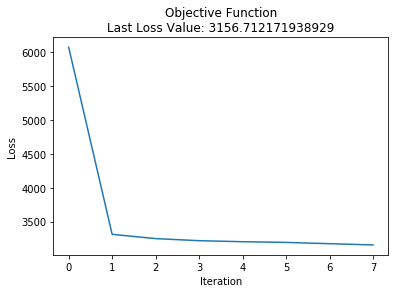

In [59]:
preprocessing = PreProcessing()
#Data Preprocessing
filepath = 'data/1.txt'
data = preprocessing.readData(filepath,3)
x, y = preprocessing.split_X_Y(data)
x = np.float32(x)


k=8
epoch = 8
model = kMeans(k)
clusters, centers, objective_function, last_loss = model.fit(x,epoch) #clusters is dictionary!

coefficients = model.Silhouette(clusters, centers)

plt.figure()
plt.plot(coefficients["0"])
plt.plot(coefficients["1"])
plt.plot(coefficients["2"])
plt.plot(coefficients["3"])
plt.plot(coefficients["4"])
plt.plot(coefficients["5"])
plt.plot(coefficients["6"])
plt.plot(coefficients["7"])
total = coefficients["0"]+coefficients["1"]+coefficients["2"]+coefficients["3"]+coefficients["4"]+coefficients["5"]+coefficients["6"]+coefficients["7"]
avg = np.mean(total)
plt.title("Mean: "+str(avg))

plt.figure()

plt.plot(objective_function)
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.title("Objective Function\n"+"Last Loss Value: "+str(last_loss))